In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns",None)
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

color_scheme = px.colors.sequential.Peach

In [4]:
df = pd.read_csv('/content/sample_data/Youtube Trending Dataset.csv')

In [5]:
print(df.shape)
df.head()

(1000, 7)


,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [6]:
df.isnull().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [7]:
df.dtypes

rank            int64
Youtuber       object
subscribers    object
video views    object
video count    object
category       object
started         int64
dtype: object

In [8]:
f_col = ['subscribers','video count','video views']

for i in f_col:
  df[i] = df[i].astype(str).apply(lambda x:x.replace(',',''))

df[f_col] = df[f_col].astype(int)

df.drop('rank',axis=1,inplace=True)

df = df.dropna().reset_index()
df.drop('index',axis=1, inplace=True)

In [9]:
print(df.shape)
df.dtypes

(973, 6)


Youtuber       object
subscribers     int64
video views     int64
video count     int64
category       object
started         int64
dtype: object

In [10]:
df.head()

,Youtuber,subscribers,video views,video count,category,started
0,T-Series,222000000,198459090822,17317,Music,2006
1,YouTube Movies,154000000,0,0,Film & Animation,2015
2,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006
3,SET India,139000000,125764252686,91271,Shows,2006
4,PewDiePie,111000000,28469458228,4497,Gaming,2010


In [11]:
df['started'].value_counts()

2014    119
2011     93
2015     92
2013     86
2012     83
2016     75
2006     72
2009     63
2017     60
2010     47
2007     45
2008     45
2018     39
2005     22
2019     17
2020     10
2021      4
1970      1
Name: started, dtype: int64

In [12]:
df.drop(np.where(df['started'] == 1970)[0][0],inplace=True)

**Starting Year of Top 100 Youtube Channels.**

Text(0.5, 1.0, 'Starting Year of Top 100 Youtube Channels')

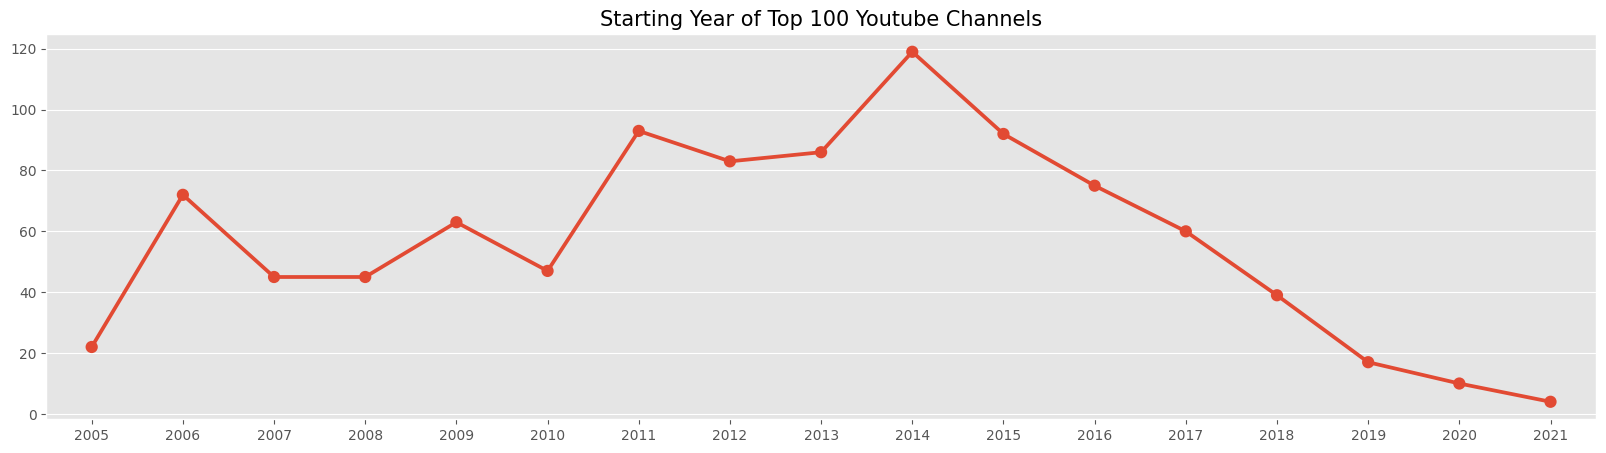

In [13]:
year = df['started'].value_counts()
plt.figure(figsize=(20,5))
sns.pointplot(x=year.index, y=year.values).set_title('Starting Year of Top 100 Youtube Channels',fontsize=15)

**Categories of Top 100 Youtube Channel**

In [14]:
category = df['category'].value_counts()
fig = px.pie(values=category.values,
             names=category.index,
             color_discrete_sequence=px.colors.sequential.Peach)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12,
                  uniformtext_mode='hide',
                  template ='ggplot2')

fig.show()

**Boxplot on Video Views, Video Counts & Subscribers**

In [15]:
fig = make_subplots(rows=1, cols=3)

fig.update_layout(title_text="Boxplot of video views & vide count & subscribers",
                  uniformtext_minsize=12,
                  uniformtext_mode='hide')

fig.add_trace(go.Box(y=df['video views'],
                    name="video views boxplot",
                    boxpoints='outliers',
                    marker_color=color_scheme[6],
                    line_color=color_scheme[3]),row=1,col=1)

fig.add_trace(go.Box(y=df['video count'],
                     name="video count boxplot",
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[4]),row=1,col=2)

fig.add_trace(go.Box(y=df['subscribers'],
                    name="subscribers boxplot",
                    boxpoints='outliers',
                    marker_color=color_scheme[6],
                    line_color=color_scheme[5]),row=1,col=3)

fig.update_layout(template = 'ggplot2')

**Categories with Video Views & Video Counts using Strip Plot and Scatter Plot**

In [17]:
def stplot(data, xcol, ycol, huecol, axs, title):
    sns.stripplot(data = data, x = xcol, y = ycol,
                  hue = huecol, edgecolor = 'red', ax = axs).set_title(title, fontsize = 20)
    axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title1 = 'Categories with video views'
title2 = 'Categories with video counts'

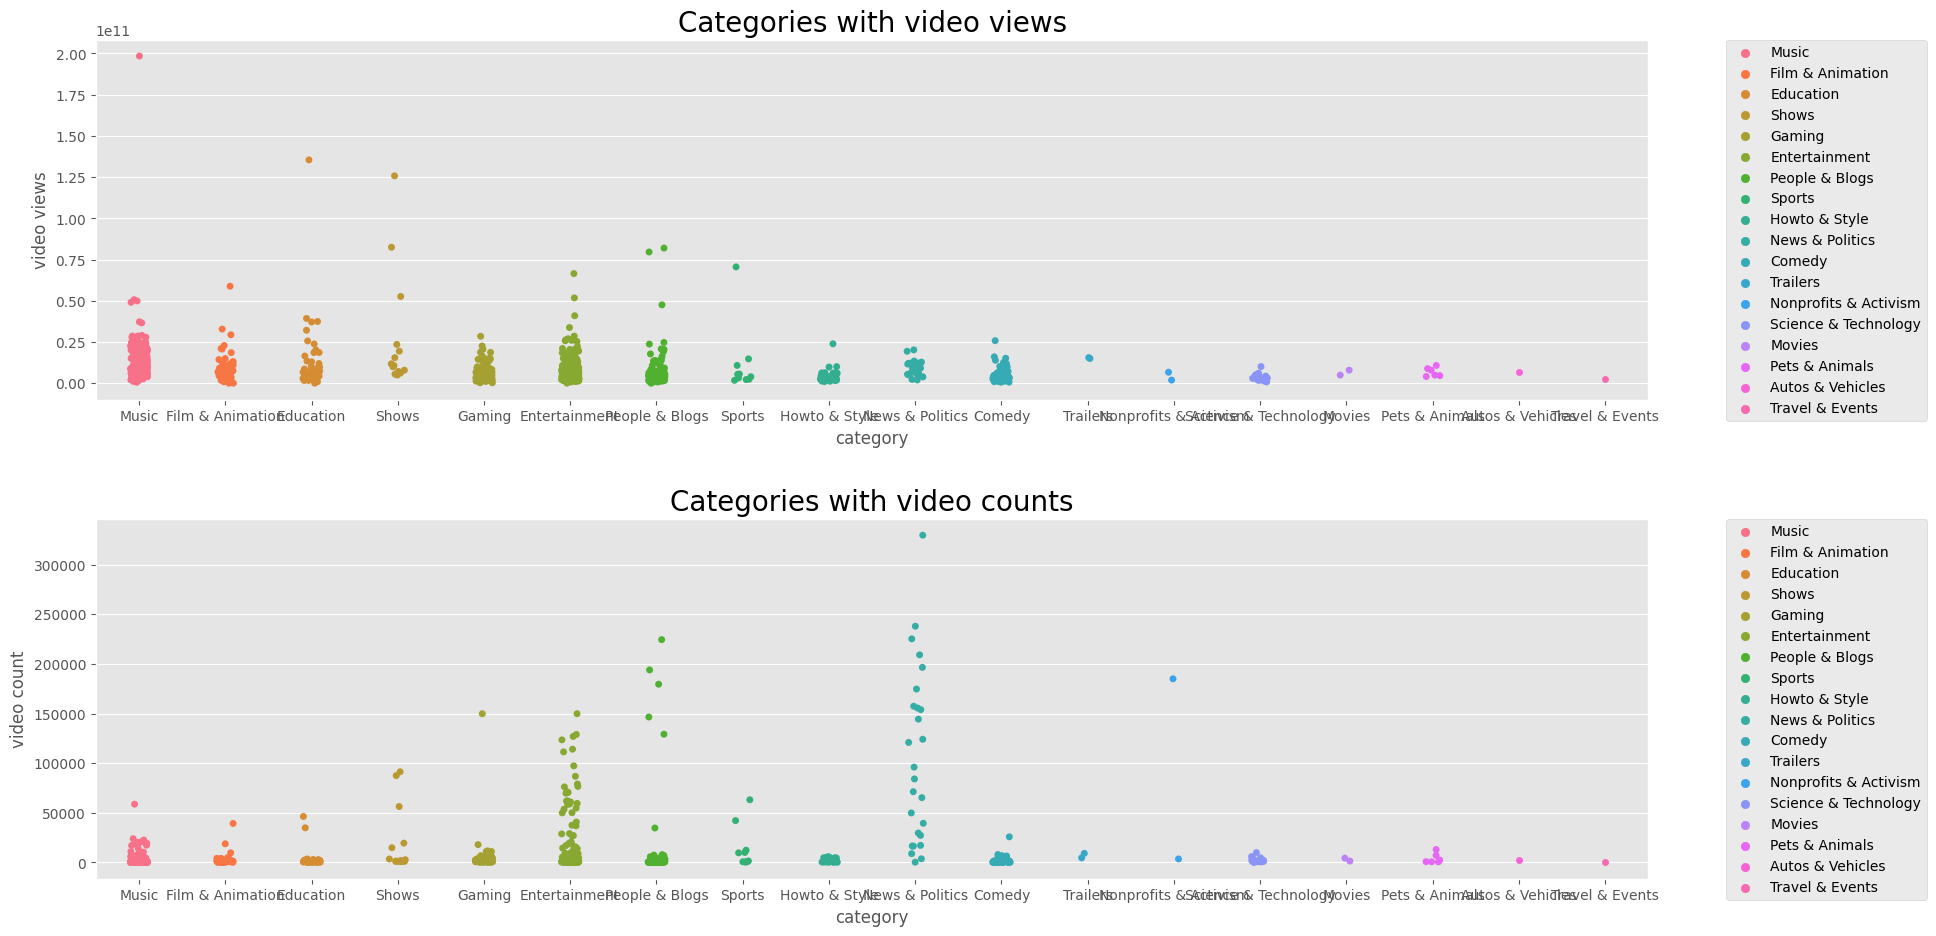

In [18]:
fig, ((ax1),(ax2)) = plt.subplots(ncols=1,nrows=2)
fig.set_size_inches(20,10)
stplot(df,'category', 'video views', 'category', ax1, title1)
stplot(df,'category', 'video count', 'category', ax2, title2)
fig.tight_layout(pad=3.0)

In [19]:
fig = px.scatter(df, x="video count", y="video views",
                 size="video views", color="category",
                 log_x=True, size_max=60,
                 title="categories with video views and video counts",
                 template = 'ggplot2')

lst = [5,6]
for idx in lst:
    fig.data[idx].marker.line.width = 5
    fig.data[idx].marker.line.color = 'black'
fig.show()

**Barplot on count of categories: 2013 to 2018**

In [20]:
def barplot(x, y, axs, palette, title):
    ax = sns.barplot(x = x, y = y, hue = x, palette = palette, dodge=False, ax=axs)
    for num in range(len(y)):
        ax.bar_label(ax.containers[num])
    ax.set_title(title)
    return ax

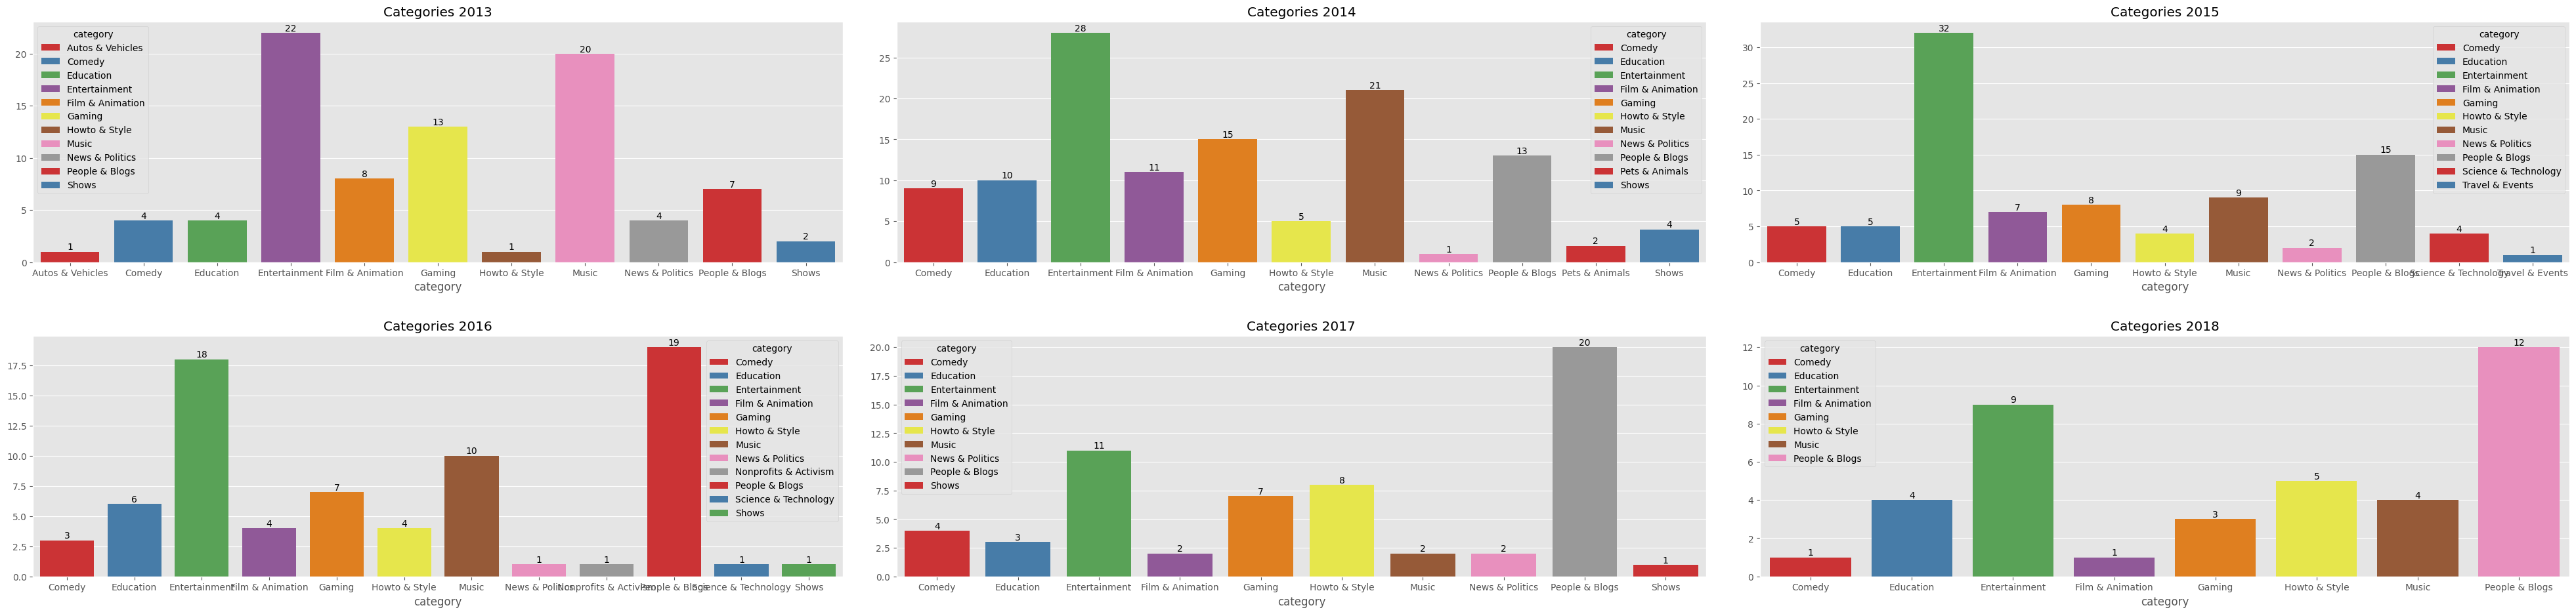

In [34]:
y_2013 = df[df['started']==2013].groupby('category').size()
y_2014 = df[df['started']==2014].groupby('category').size()
y_2015 = df[df['started']==2015].groupby('category').size()
y_2016 = df[df['started']==2016].groupby('category').size()
y_2017 = df[df['started']==2017].groupby('category').size()
y_2018 = df[df['started']==2018].groupby('category').size()

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(40,10)
barplot(y_2013.index, y_2013.values, ax1, 'Set1', 'Categories 2013')
barplot(y_2014.index, y_2014.values, ax2, 'Set1', 'Categories 2014')
barplot(y_2015.index, y_2015.values, ax3, 'Set1', 'Categories 2015')
barplot(y_2016.index, y_2016.values, ax4, 'Set1', 'Categories 2016')
barplot(y_2017.index, y_2017.values, ax5, 'Set1', 'Categories 2017')
barplot(y_2018.index, y_2018.values, ax6, 'Set1', 'Categories 2018')

fig.tight_layout(pad=3.0)

**Barplot on count of categories: 2005 to 2010**

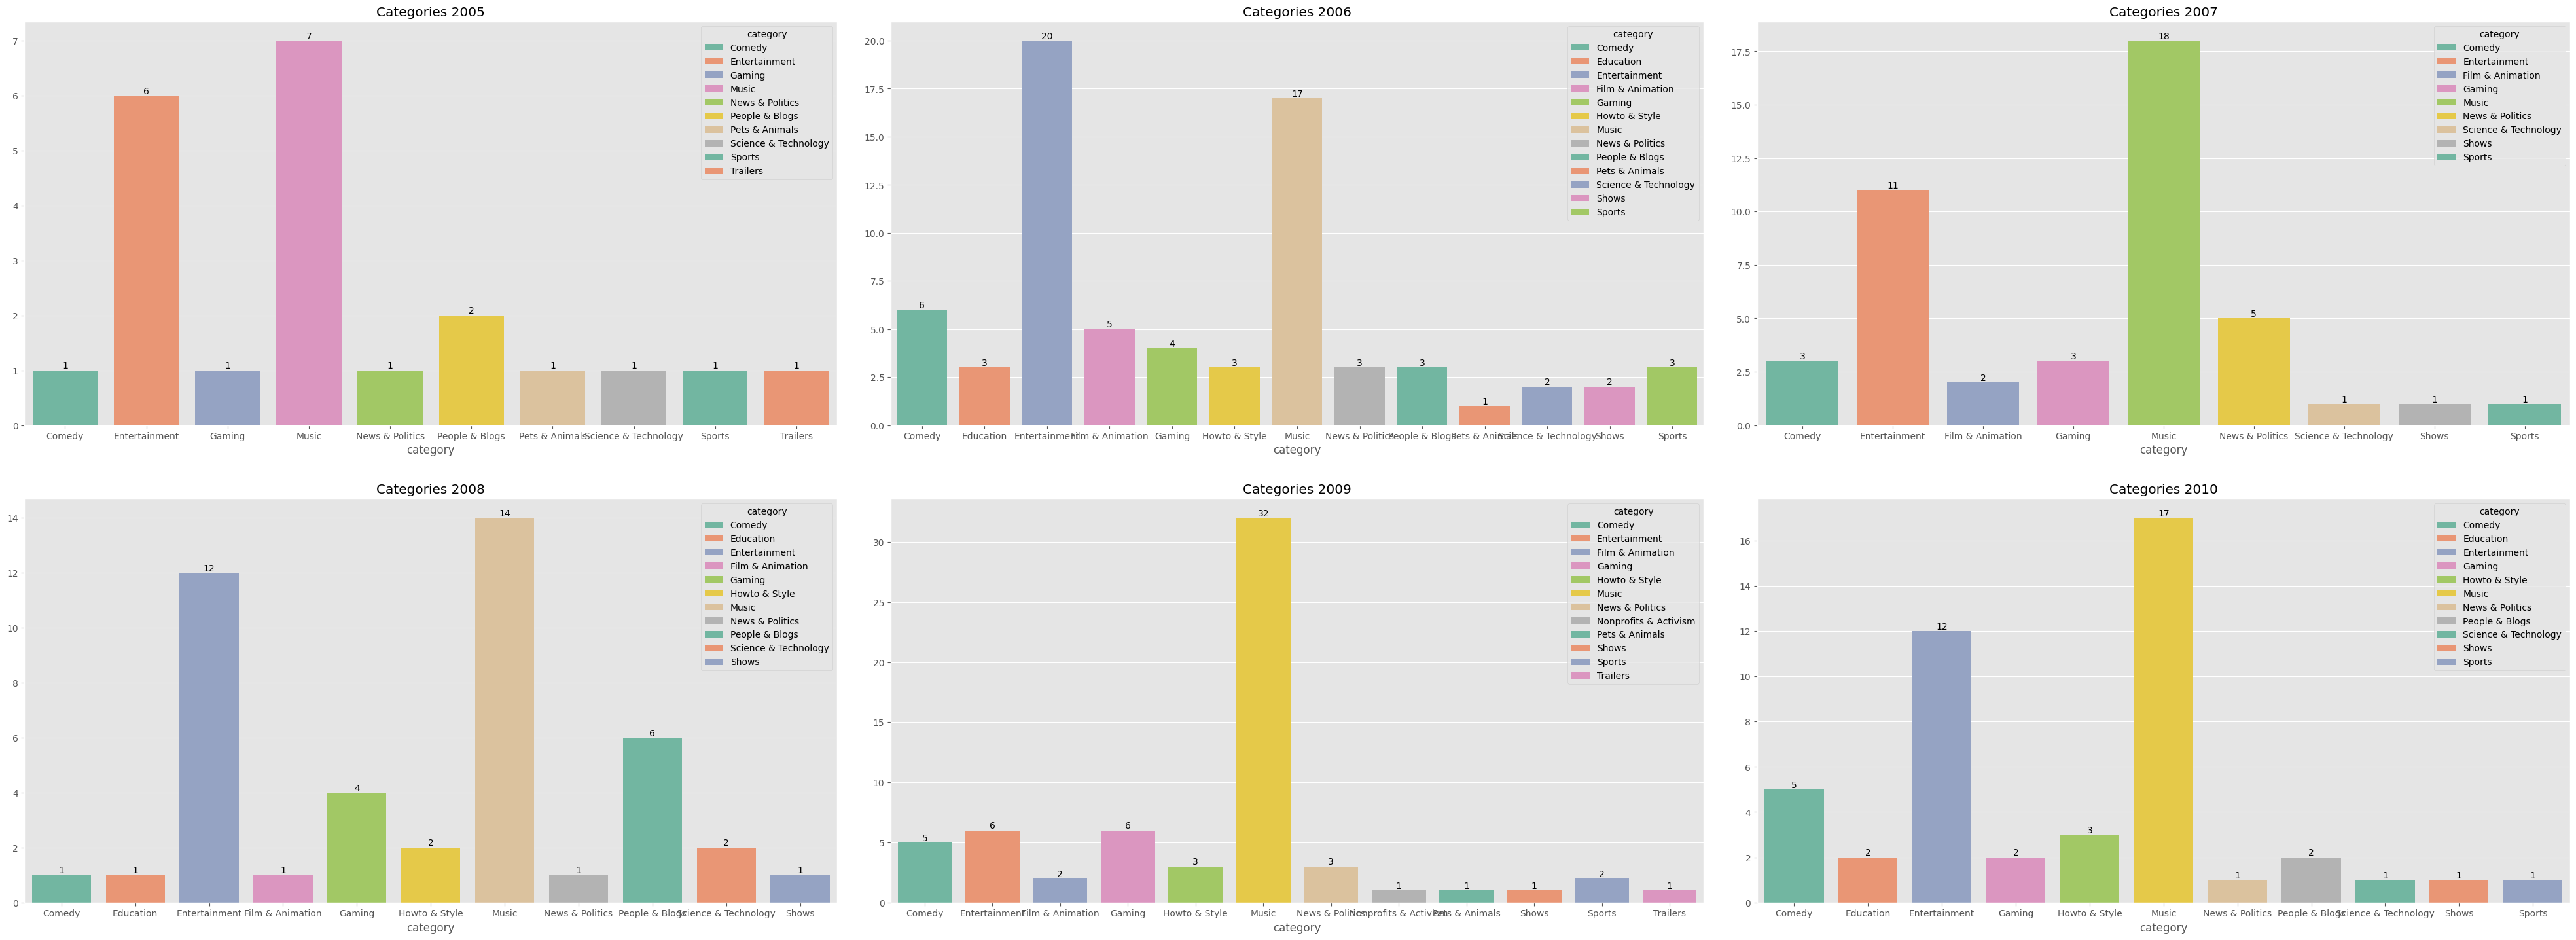

In [33]:
y_2005 = df[df['started']==2005].groupby('category').size()
y_2006 = df[df['started']==2006].groupby('category').size()
y_2007 = df[df['started']==2007].groupby('category').size()
y_2008 = df[df['started']==2008].groupby('category').size()
y_2009 = df[df['started']==2009].groupby('category').size()
y_2010 = df[df['started']==2010].groupby('category').size()

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(40,15)
barplot(y_2005.index, y_2005.values, ax1,  'Set2', 'Categories 2005')
barplot(y_2006.index, y_2006.values, ax2,  'Set2', 'Categories 2006')
barplot(y_2007.index, y_2007.values, ax3,  'Set2', 'Categories 2007')
barplot(y_2008.index, y_2008.values, ax4,  'Set2', 'Categories 2008')
barplot(y_2009.index, y_2009.values, ax5,  'Set2', 'Categories 2009')
barplot(y_2010.index, y_2010.values, ax6,  'Set2', 'Categories 2010')

fig.tight_layout(pad=3.0)

**Youtuber with Most Subscribers by Each Category using Tree Map and Bar Chart**

In [23]:
a = df.groupby(['category'])['subscribers'].max()

most = df[df['subscribers'].isin(a.values)]

# plt.figure(figsize=(10,5))
fig = px.treemap(most,
                 path=['category','Youtuber'],
                 values='subscribers',
                 title = ' Youtuber with most subscribers in each category',
                 color_discrete_sequence= color_scheme,
                 width=1000, height=500)
fig.update_layout(template = 'ggplot2')
fig.show()

In [25]:
fig = go.Figure(data=px.bar(x=most.category,
                            y=most.subscribers,
                            text = most.Youtuber,
                            orientation='v',
                            color=most.category,
                            color_discrete_sequence=px.colors.sequential.Sunsetdark,
                            title='Youtuber with most susbcribers in eacy categories',
                            height=600))

fig.show()

**Top 5 Youtubers with subscribers, Video Views and Video Counts**

In [26]:
def barplt(x, y, data, palette, axs, title):
    ax = sns.barplot(x=x,
            y=y,
            hue = x,
            data=data,
            dodge=False,
            palette=palette,ax=axs).set_title(title)

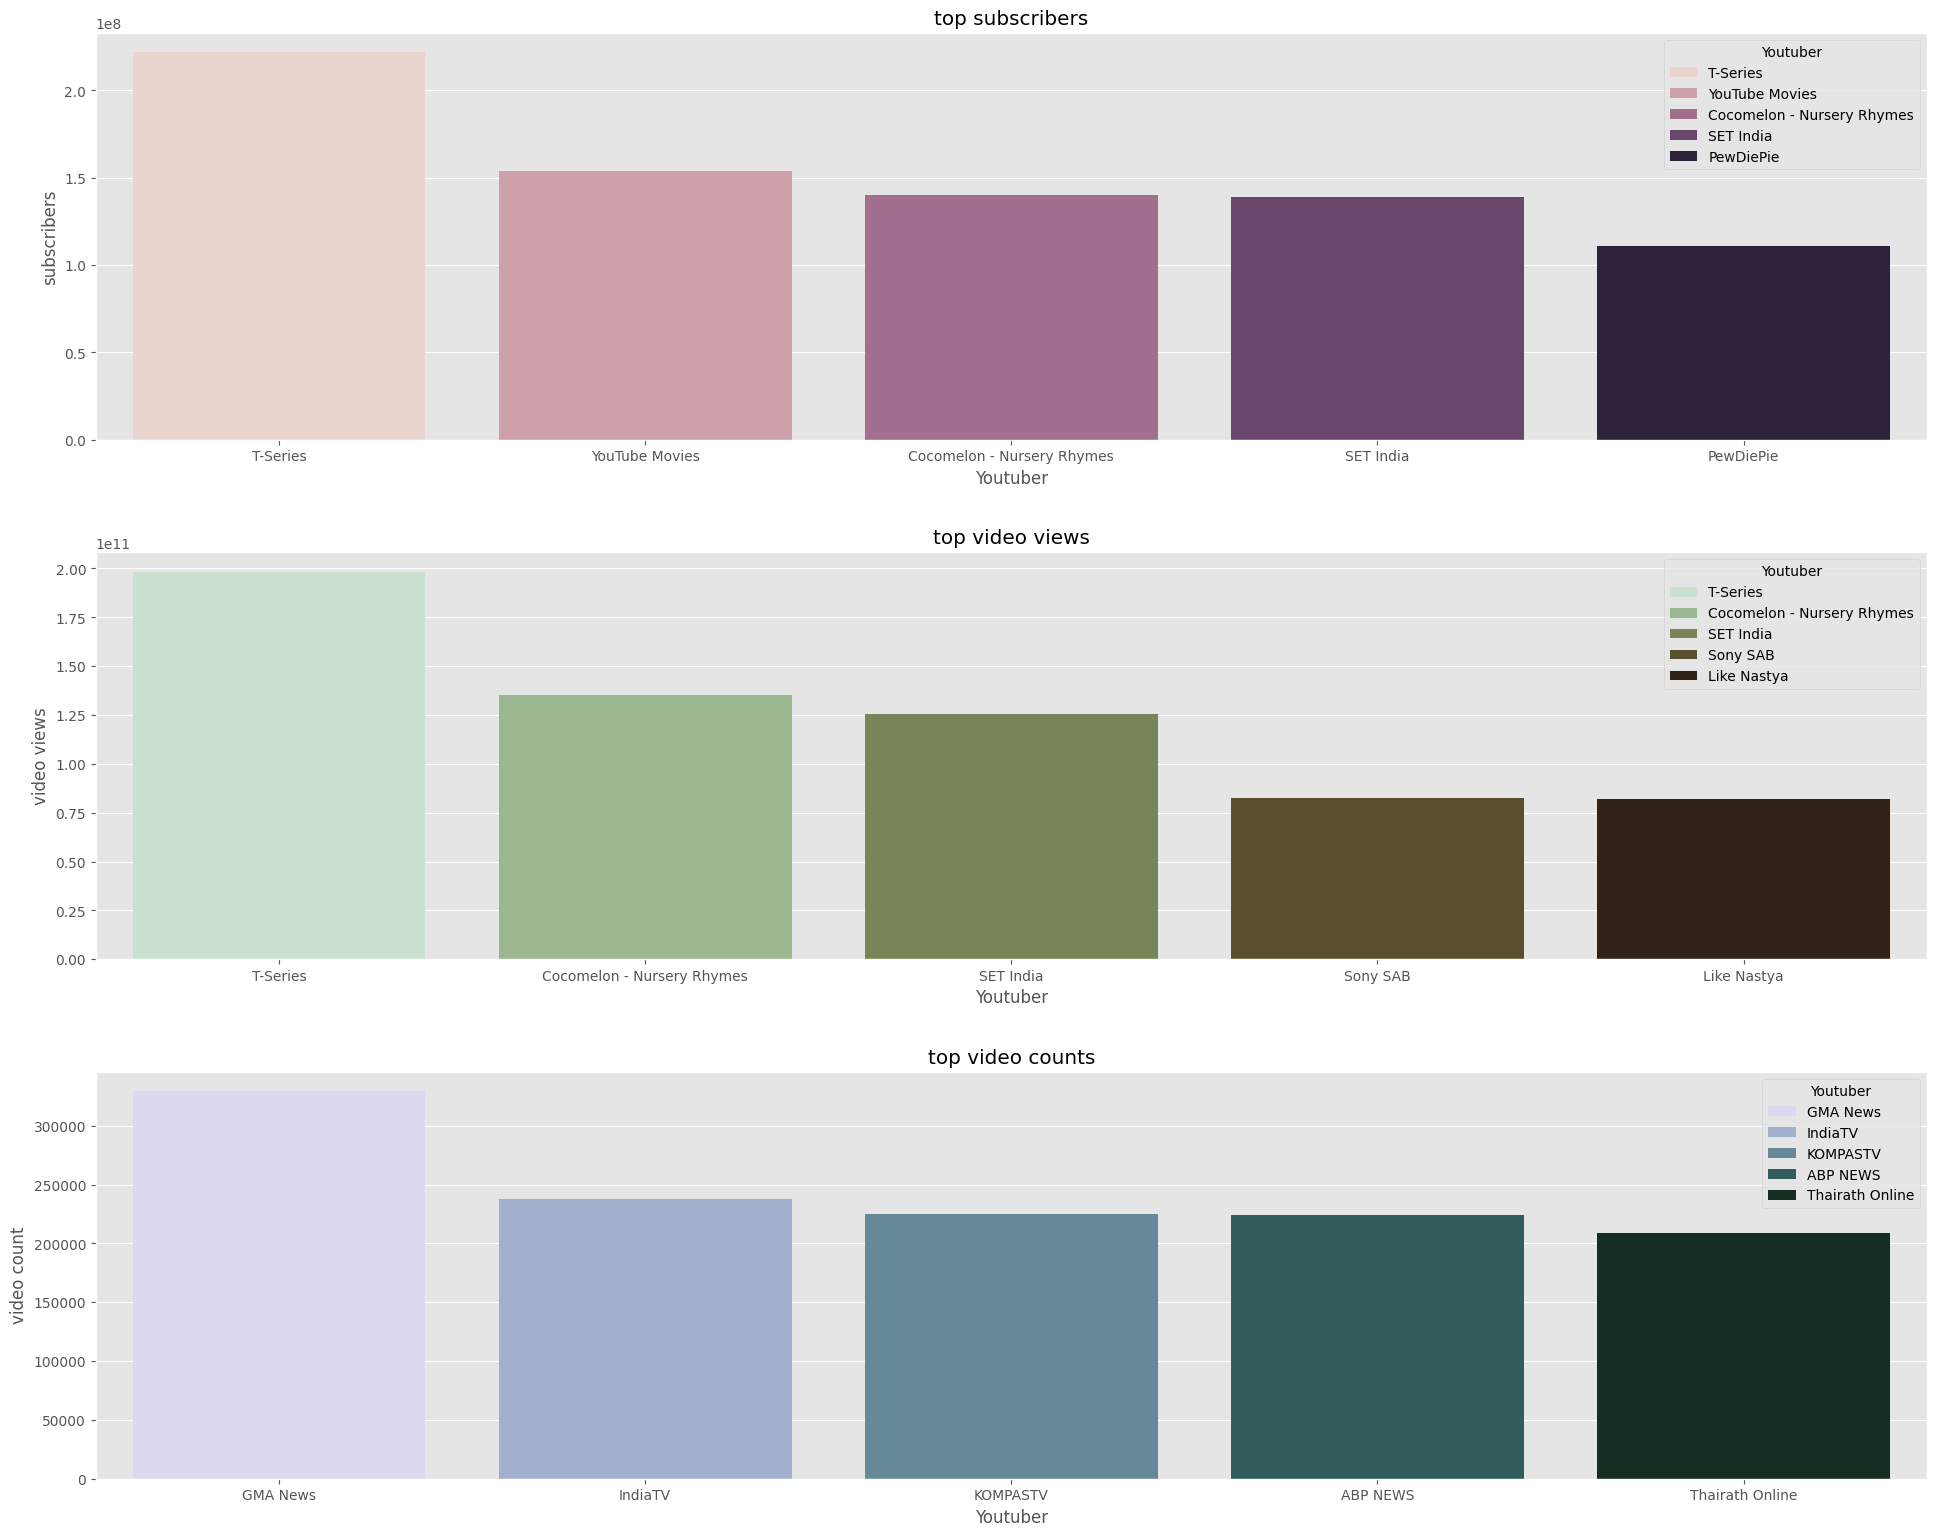

In [27]:

subscribers_sorted = df.sort_values('subscribers',ascending=False)
subscribers_sorted = subscribers_sorted[:5]

video_views_sorted = df.sort_values('video views',ascending=False)
video_views_sorted = video_views_sorted[:5]

video_counts_sorted = df.sort_values('video count',ascending=False)
video_counts_sorted = video_counts_sorted[:5]

fig, ((ax1),(ax2),(ax3)) = plt.subplots(ncols=1,nrows=3)
fig.set_size_inches(20,16)

barplt("Youtuber","subscribers",subscribers_sorted,"ch:30",ax1,'top subscribers')
barplt("Youtuber","video views",video_views_sorted,"ch:25",ax2,'top video views')
barplt("Youtuber","video count",video_counts_sorted,"ch:20",ax3,'top video counts')

fig.tight_layout(pad=3.0)

**Regplot on Subscribers ,Video Views & Video Counts**

Text(0.5, 1.0, 'Video Views with Video Counts')

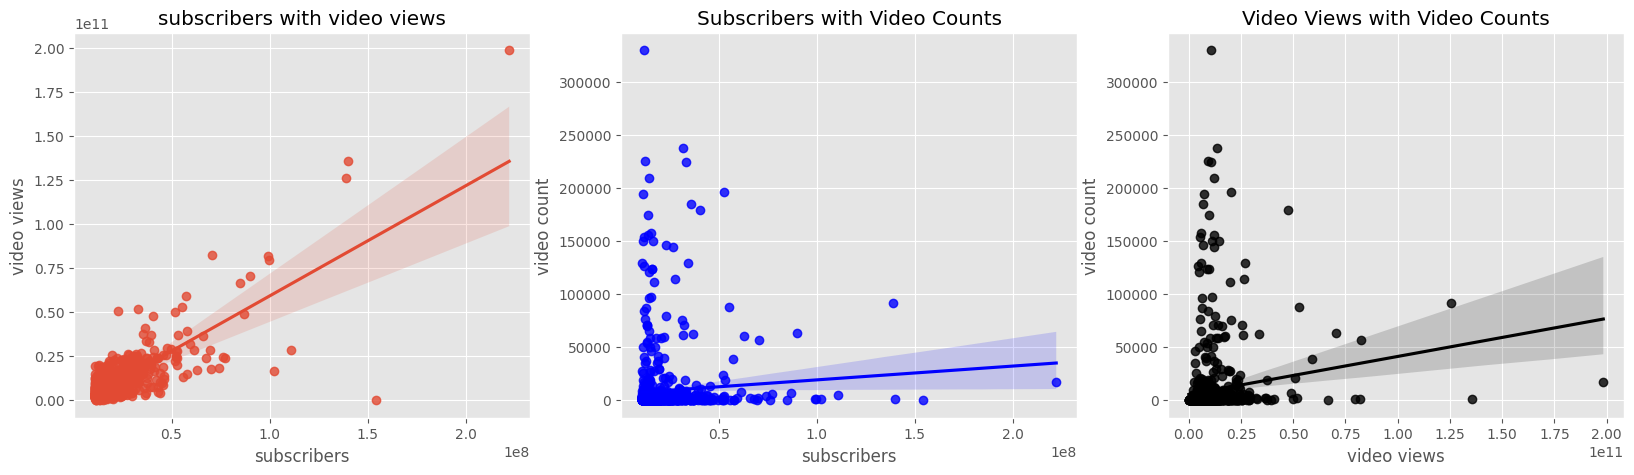

In [28]:
fig, ((ax1,ax2,ax3)) = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(20,5)

sns.regplot(x=df['subscribers'],
                y=df['video views'],
                ax=ax1).set_title('subscribers with video views')
sns.regplot(x=df['subscribers'],
                y=df['video count'],
                ax=ax2,
                color='blue').set_title('Subscribers with Video Counts')
sns.regplot(x=df['video views'],
                y=df['video count'],
                ax=ax3,
                color='black').set_title('Video Views with Video Counts')

**Correlation heatmap**

<ipython-input-31-114d7a34642e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

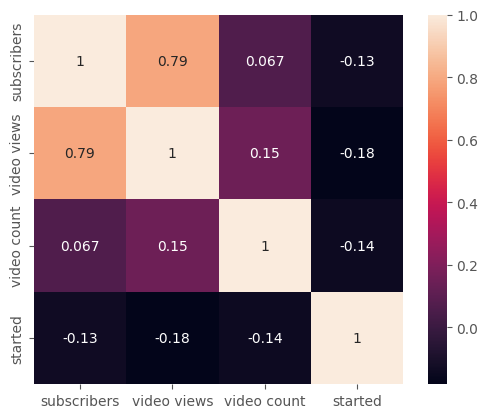

In [31]:
fig.set_size_inches(25,8)
sns.heatmap(df.corr(), square = True, annot = True)